<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Assignment: Notebook for Peer Assignment

Estimated time needed: 45 minutes


# Assignment Scenario

Congratulations! You have just been hired by a US Venture Capital firm as a data analyst.

The company is considering foreign grain markets to help meet its supply chain requirements for its recent investments in the microbrewery and microdistillery industry, which is involved with the production and distribution of craft beers and spirits.

Your first task is to provide a high level analysis of crop production in Canada. Your stakeholders want to understand the current and historical performance of certain crop types in terms of supply and price volatility. For now they are mainly interested in a macro-view of Canada's crop farming industry, and how it relates to the relative value of the Canadian and US dollars.


# Introduction

Using this R notebook you will:

1.  Understand four datasets 
2.  Load the datasets into four separate tables in a Db2 database
3.  Execute SQL queries unsing the RODBC R package to answer assignment questions 

You have already encountered two of these datasets in the previous practice lab. You will be able to reuse much of the work you did there to prepare your database tables for executing SQL queries.


# Understand the datasets

To complete the assignment problems in this notebook you will be using subsetted snapshots of two datasets from Statistics Canada, and one from the Bank of Canada. The links to the prepared datasets are provided in the next section; the interested student can explore the landing pages for the source datasets as follows:

1.  <a href="https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3210035901">Canadian Principal Crops (Data & Metadata)</a>
2.  <a href="https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3210007701">Farm product prices (Data & Metadata)</a>
3.  <a href="https://www.bankofcanada.ca/rates/exchange/daily-exchange-rates">Bank of Canada daily average exchange rates</a>

### 1. Canadian Principal Crops Data *

This dataset contains agricultural production measures for the principle crops grown in Canada, including a breakdown by province and teritory, for each year from 1908 to 2020.

For this assignment you will use a preprocessed snapshot of this dataset (see below).

A detailed description of this dataset can be obtained from the StatsCan Data Portal at:
[https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3210035901](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3210035901&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-RP0203EN-SkillsNetwork-23863830&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-RP0203EN-SkillsNetwork-23863830&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)  
Detailed information is included in the metadata file and as header text in the data file, which can be downloaded - look for the 'download options' link.  

### 2. Farm product prices

This dataset contains monthly average farm product prices for Canadian crops and livestock by province and teritory, from 1980 to 2020 (or 'last year', whichever is greatest).

For this assignment you will use a preprocessed snapshot of this dataset (see below).

A description of this dataset can be obtained from the StatsCan Data Portal at:
[https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3210007701](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3210007701&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-RP0203EN-SkillsNetwork-23863830&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) 
The information is included in the metadata file, which can be downloaded - look for the 'download options' link.  

### 3. Bank of Canada daily average exchange rates *

This dataset contains the daily average exchange rates for multiple foreign currencies. Exchange rates are expressed as 1 unit of the foreign currency converted into Canadian dollars. It includes only the latest four years of data, and the rates are published once each business day by 16:30 ET.

For this assignment you will use a snapshot of this dataset with only the USD-CAD exchange rates included (see next section). We have also prepared a monthly averaged version which you will be using below.

A brief description of this dataset and the original dataset can be obtained from the Bank of Canada Data Portal at:
[https://www.bankofcanada.ca/rates/exchange/daily-exchange-rates/](https://www.bankofcanada.ca/rates/exchange/daily-exchange-rates?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-RP0203EN-SkillsNetwork-23863830&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

( * these datasets are the same as the ones you used in the practice lab)


### Dataset URLs

1.  Annual Crop Data: <https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-RP0203EN-SkillsNetwork/labs/Final%20Project/Annual_Crop_Data.csv> 

2.  Farm product prices: <https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-RP0203EN-SkillsNetwork/labs/Final%20Project/Monthly_Farm_Prices.csv>

3.  Daily FX Data: <https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-RP0203EN-SkillsNetwork/labs/Final%20Project/Daily_FX.csv>

4.  Monthly FX Data: <https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-RP0203EN-SkillsNetwork/labs/Final%20Project/Monthly_FX.csv>

<span style="color:red">**IMPORTANT:**</span> You will be loading these datasets directly into R data frames from these URLs instead of from the StatsCan and Bank of Canada portals. The versions provided at these URLs are simplified and subsetted versions of the original datasets.


#### Now let's load these datasets into four separate Db2 tables.

Let's first load the RODBC package:


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Establish database connection
import sqlite3 as sq3
import ibm_db
import ibm_db_dbi
%load_ext sql
%matplotlib inline

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

## Problem 1

#### Create tables

Establish a connection to the Db2 database, and create the following four tables using the RODBC package in R. 
Use the separate cells provided below to create each of your tables.

1.  **CROP_DATA**
2.  **FARM_PRICES**
3.  **DAILY_FX**
4.  **MONTHLY_FX**  

The previous practice lab will help you accomplish this.


### Solution 1


### IBM DB

In [ ]:
#Replace the placeholder values with your actual Db2 hostname, username, and password:
dsn_hostname = "dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net" # e.g.: "dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net"
dsn_uid = "glm90595"        # e.g. "abc12345"
dsn_pwd = "m3rrl046qnqcx^35"      # e.g. "7dBZ3wWt9XN6$o0J"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            # e.g. "BLUDB"
dsn_port = "50000"                # e.g. "50000" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"

In [ ]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create the dsn connection string
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

#print the connection string to check correct values are specified
print(dsn)

In [ ]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create database connection

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )


In [ ]:
#Retrieve Metadata for the Database Server
server = ibm_db.server_info(conn)

print ("DBMS_NAME: ", server.DBMS_NAME)
print ("DBMS_VER:  ", server.DBMS_VER)
print ("DB_NAME:   ", server.DB_NAME)

In [ ]:
#Retrieve Metadata for the Database Client / Driver
client = ibm_db.client_info(conn)

print ("DRIVER_NAME:          ", client.DRIVER_NAME) 
print ("DRIVER_VER:           ", client.DRIVER_VER)
print ("DATA_SOURCE_NAME:     ", client.DATA_SOURCE_NAME)
print ("DRIVER_ODBC_VER:      ", client.DRIVER_ODBC_VER)
print ("ODBC_VER:             ", client.ODBC_VER)
print ("ODBC_SQL_CONFORMANCE: ", client.ODBC_SQL_CONFORMANCE)
print ("APPL_CODEPAGE:        ", client.APPL_CODEPAGE)
print ("CONN_CODEPAGE:        ", client.CONN_CODEPAGE)

In [ ]:
ibm_db.close(conn)

### SQLite

### Test Connection

In [ ]:
con = sq3.connect("sqlite_data.db")

In [ ]:
con.execute("Select * FROM sqlite_master").fetchall() #Check no data

In [ ]:
con.close()

### Create Tables

In [2]:
# CROP_DATA:
df1 = pd.read_csv("Annual_Crop_Data.csv", parse_dates=["YEAR"])
df1.head()

,index,YEAR,cropType,GEO,seededArea,harvestedArea,production,avgYield
0,0,1965-12-31,Barley,Alberta,1372000,1372000,2504000,1825
1,1,1965-12-31,Barley,Canada,2476800,2476800,4752900,1920
2,2,1965-12-31,Barley,Saskatchewan,708000,708000,1415000,2000
3,3,1965-12-31,Canola,Alberta,297400,297400,215500,725
4,4,1965-12-31,Canola,Canada,580700,580700,512600,885


In [3]:
df1.isnull().sum()

index            0
YEAR             0
cropType         0
GEO              0
seededArea       0
harvestedArea    0
production       0
avgYield         0
dtype: int64

In [4]:
CROP_DATA = df1.copy()

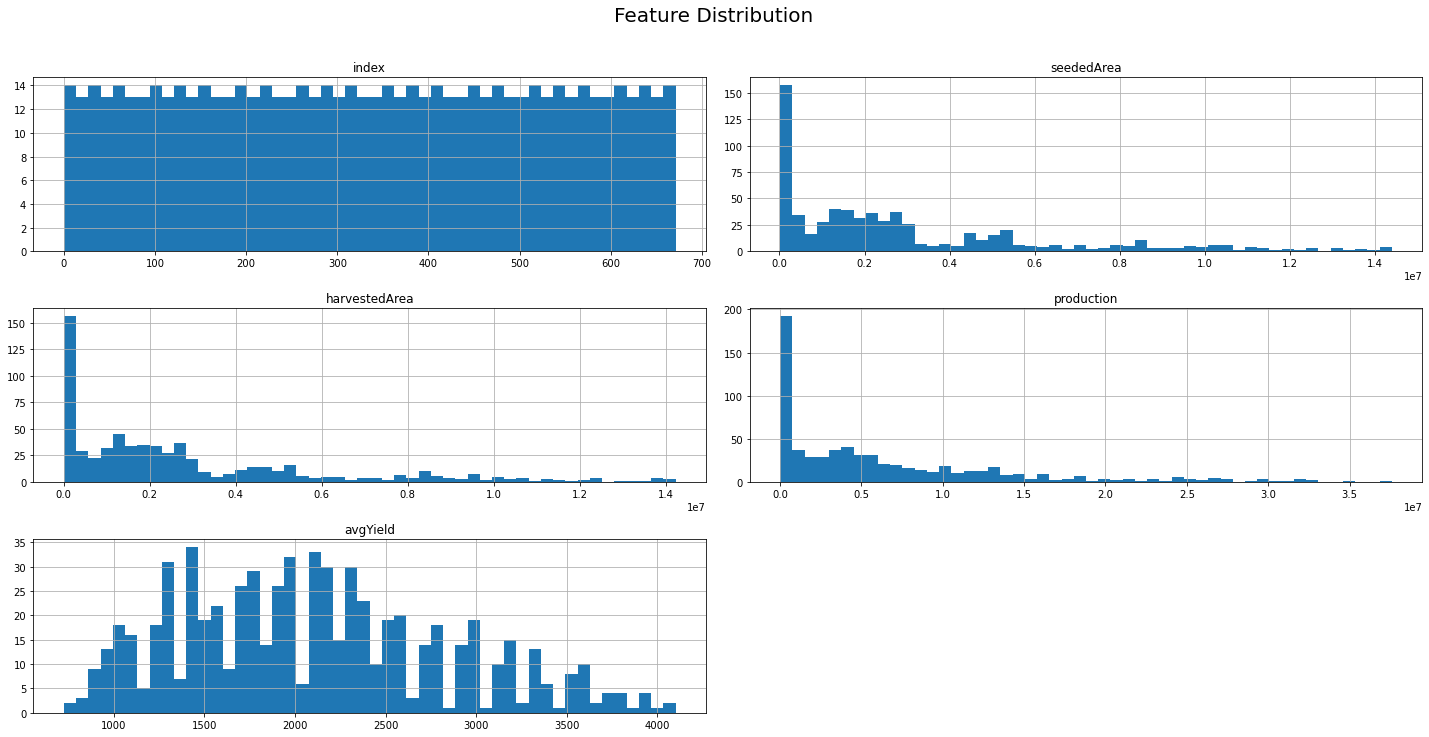

In [5]:
df1.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

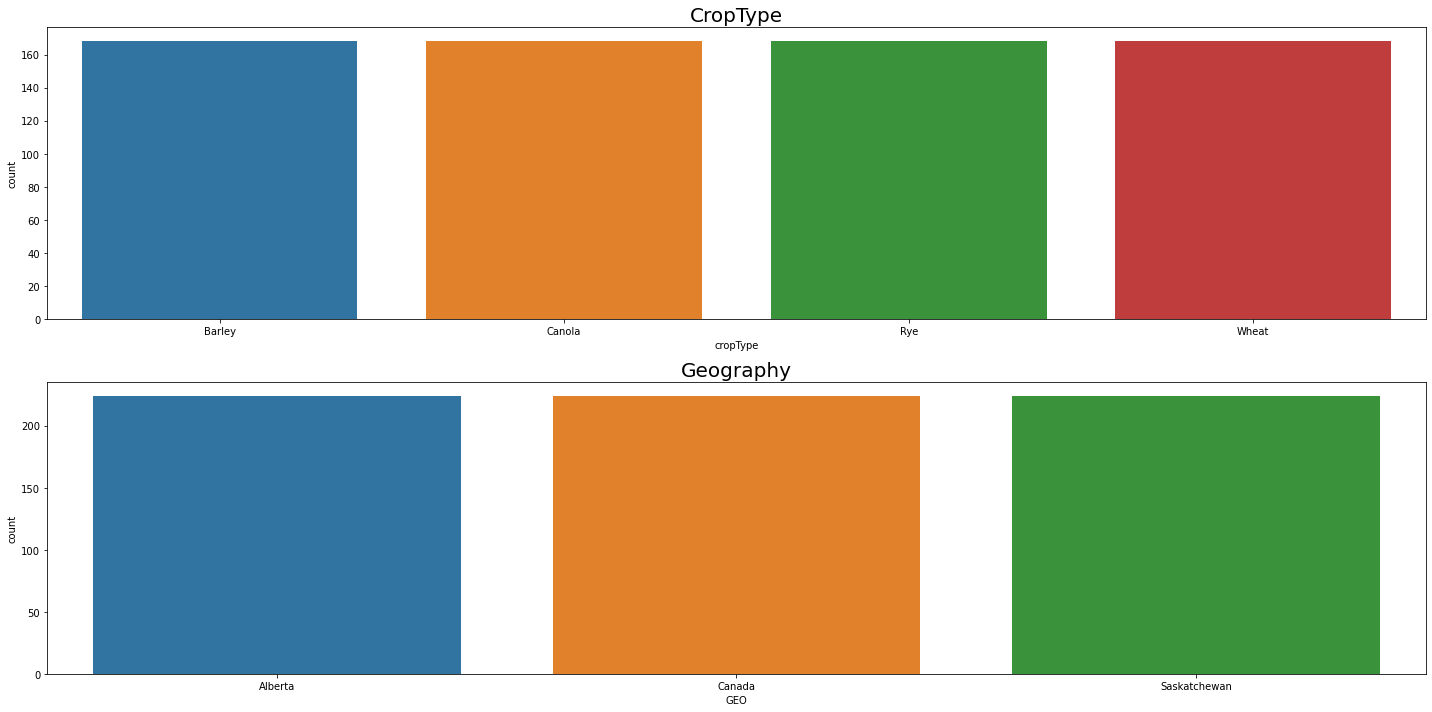

In [6]:
plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
plt.title("CropType", size=20)
sns.countplot(x=df1.cropType)

plt.subplot(2,1,2)
plt.title("Geography", size=20)
sns.countplot(x=df1.GEO)

plt.tight_layout()
plt.show()

In [7]:
# FARM_PRICES:
df2 = pd.read_csv("Monthly_Farm_Prices.csv", parse_dates=["date"])
df2.head()

,index,date,cropType,GEO,pricePerMT
0,0,1985-01-01,Barley,Alberta,127.39
1,1,1985-01-01,Barley,Saskatchewan,121.38
2,2,1985-01-01,Canola,Alberta,342.00
3,3,1985-01-01,Canola,Saskatchewan,339.82
4,4,1985-01-01,Rye,Alberta,100.77


In [8]:
df2.isnull().sum()

index         0
date          0
cropType      0
GEO           0
pricePerMT    0
dtype: int64

In [9]:
FARM_PRICES = df2.copy()

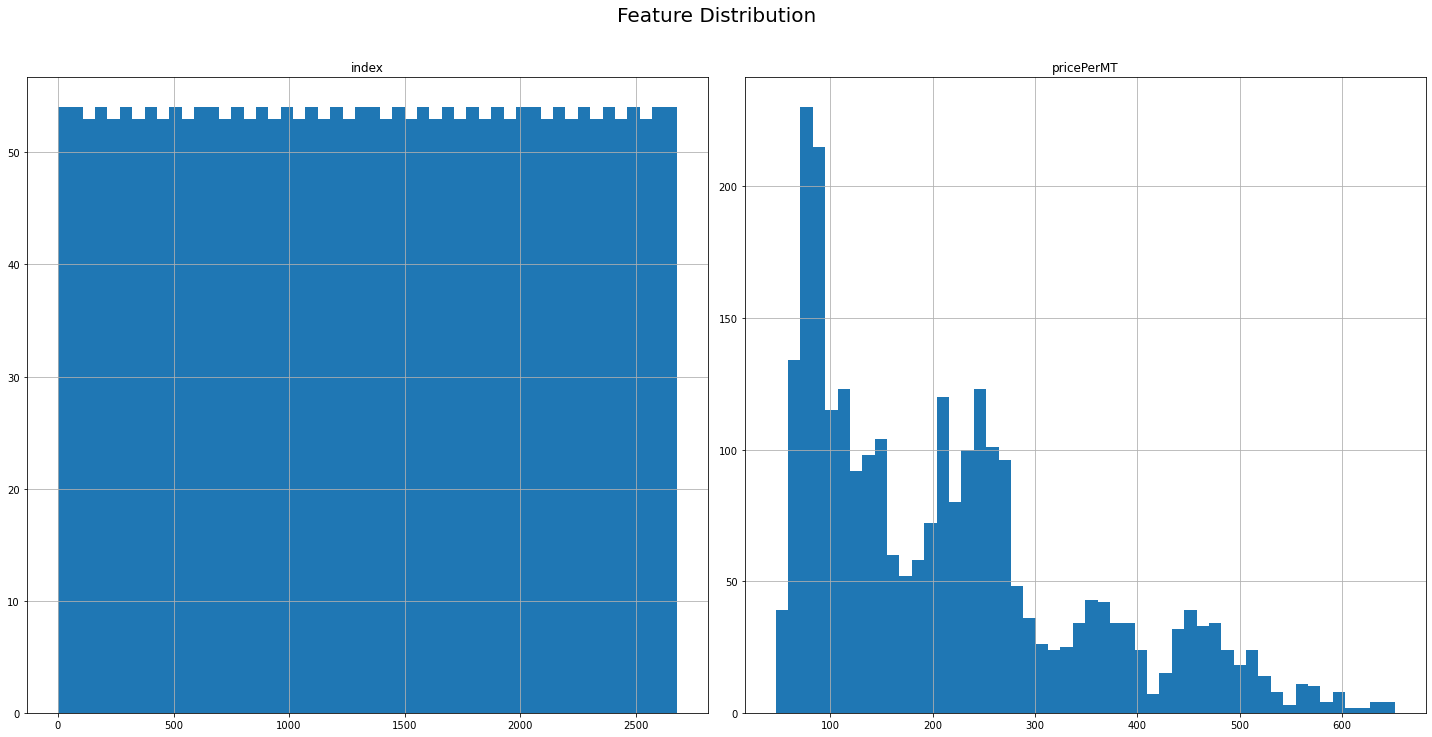

In [10]:
df2.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

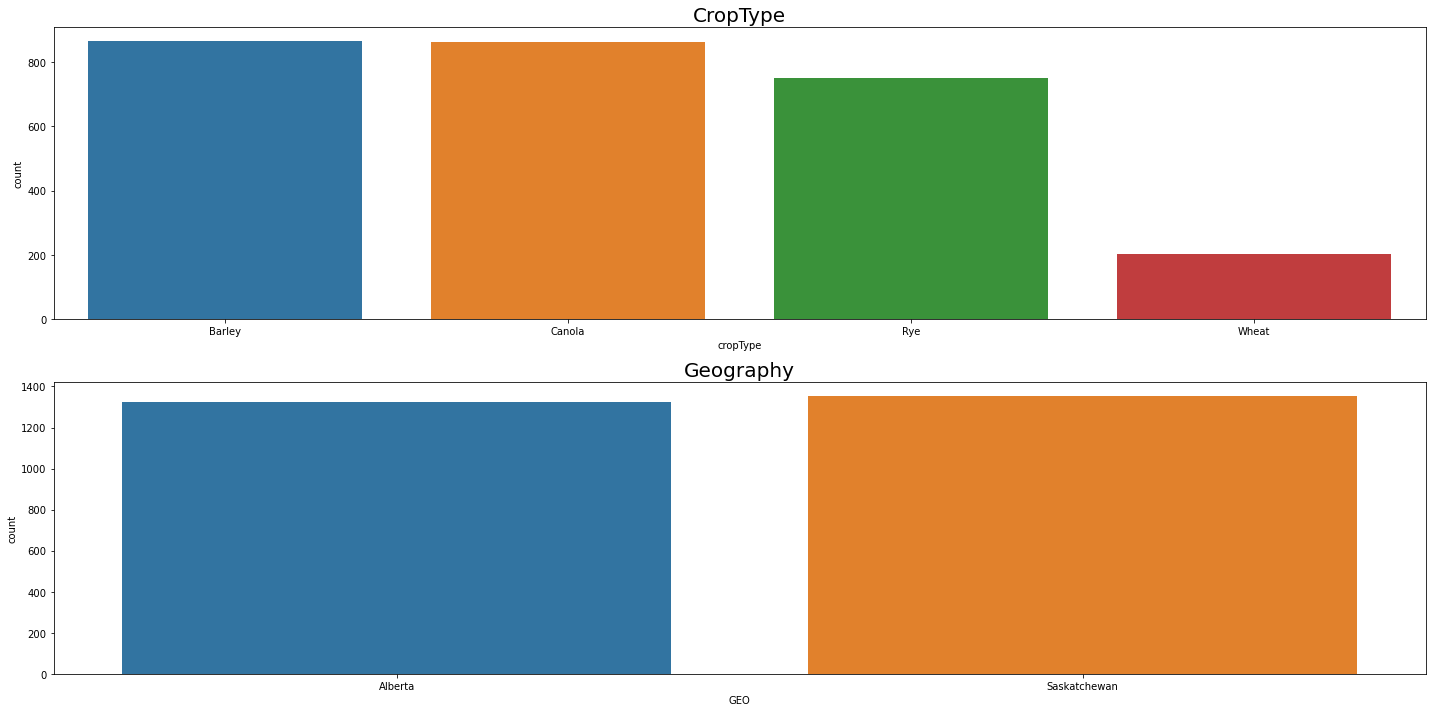

In [11]:
plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
plt.title("CropType", size=20)
sns.countplot(x=df2.cropType)

plt.subplot(2,1,2)
plt.title("Geography", size=20)
sns.countplot(x=df2.GEO)

plt.tight_layout()
plt.show()

In [12]:
# DAILY_FX:
df3 = pd.read_csv("Daily_FX.csv", parse_dates=["date"])
df3.head()

,index,date,FXUSDCAD
0,0,2017-01-03,1.34
1,1,2017-01-04,1.33
2,2,2017-01-05,1.32
3,3,2017-01-06,1.32
4,4,2017-01-09,1.32


In [13]:
df3.isnull().sum()

index       0
date        0
FXUSDCAD    0
dtype: int64

In [14]:
DAILY_FX = df3.copy()

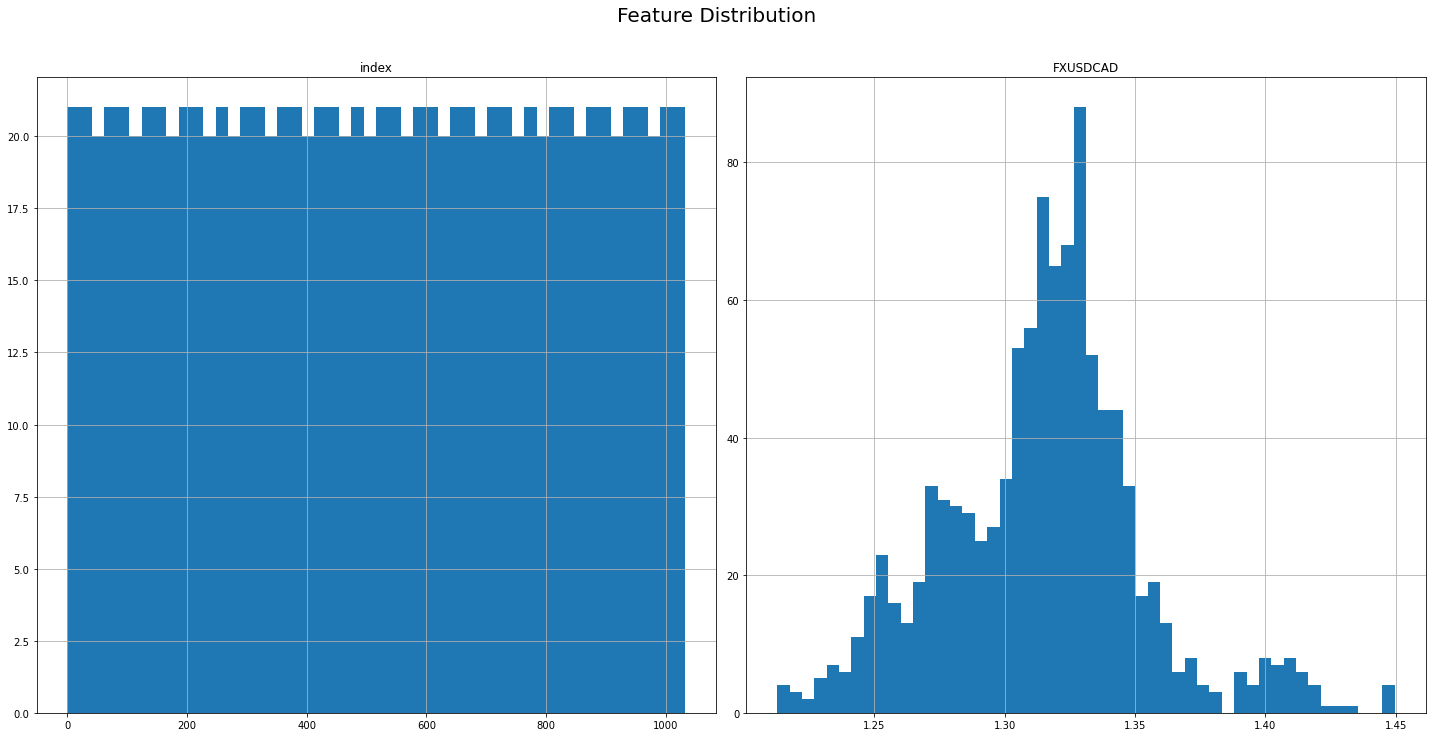

In [15]:
df3.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

In [16]:
# MONTHLY_FX:
df4 = pd.read_csv("Monthly_FX.csv", parse_dates=["date"])
df4.head()

,index,date,FXUSDCAD
0,0,2017-01-01,1.32
1,1,2017-02-01,1.31
2,2,2017-03-01,1.34
3,3,2017-04-01,1.34
4,4,2017-05-01,1.36


In [17]:
df4.isnull().sum()

index       0
date        0
FXUSDCAD    0
dtype: int64

In [18]:
MONTHLY_FX = df4.copy()

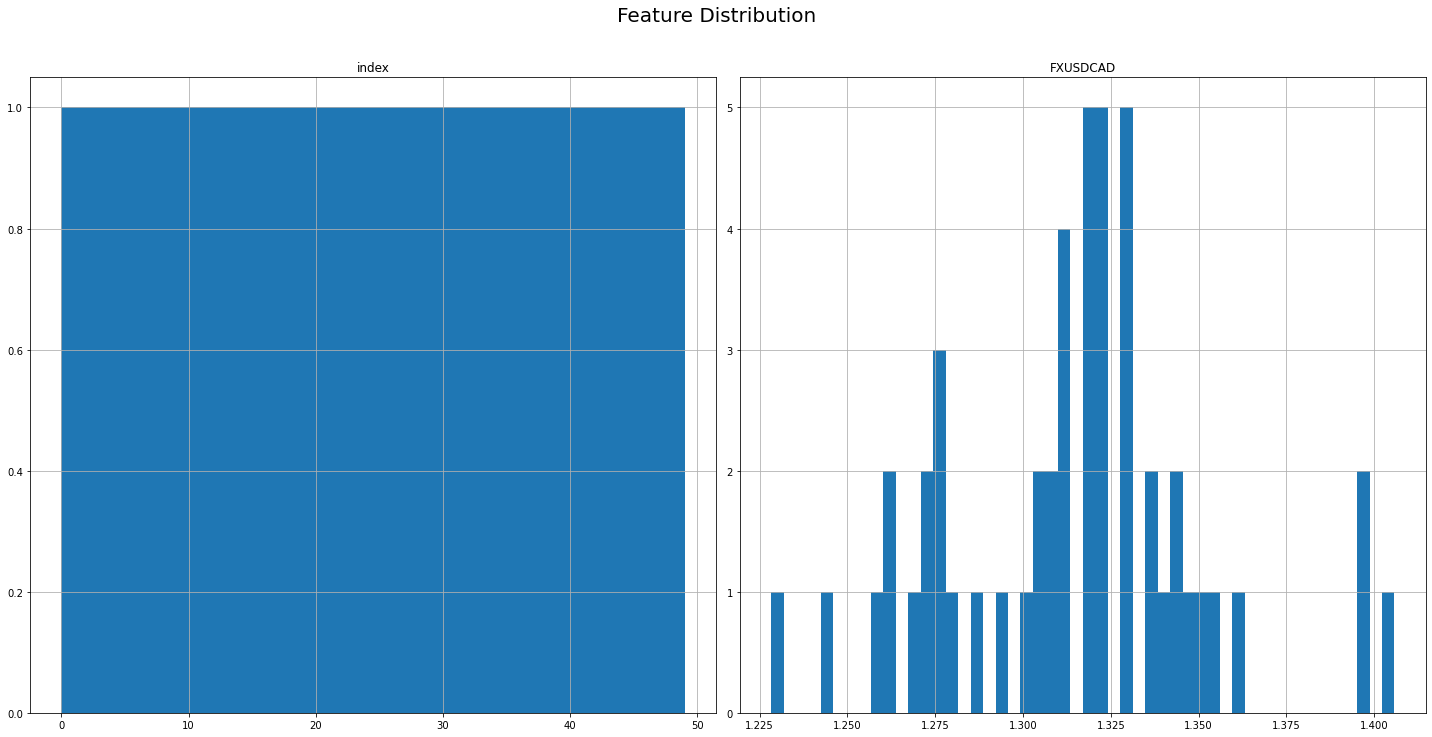

In [19]:
df4.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

### Upload to Database

In [ ]:
con = sq3.connect("sqlite_data.db")

In [ ]:
con

In [ ]:
CROP_DATA.to_sql("Cropdata", con, index=False)

In [ ]:
FARM_PRICES.to_sql("Farmprices", con, index=False)

In [ ]:
DAILY_FX.to_sql("Dailyfx", con, index=False)

In [ ]:
MONTHLY_FX.to_sql("Monthlyfx", con, index=False)

In [ ]:
con.execute("Select * FROM sqlite_master").fetchall()

In [ ]:
pd.read_sql_query("Select * FROM sqlite_master", con) #Check all tables inside database

In [ ]:
con.close()

## Problem 2

#### Read Datasets and Load Tables

Read the datasets into R dataframes using the urls provided above. Then load your tables.


### Solution 2


In [20]:
db = sq3.connect("sqlite_data.db") #Create connection

In [21]:
cursor = db.cursor()

In [22]:
pd.read_sql_query('SELECT * FROM sqlite_master', db) #Check all tables

,type,name,tbl_name,rootpage,sql
0,table,Cropdata,Cropdata,2,"CREATE TABLE ""Cropdata"" (\n""index"" INTEGER,\n ..."
1,table,Farmprices,Farmprices,13,"CREATE TABLE ""Farmprices"" (\n""index"" INTEGER,\..."
2,table,Dailyfx,Dailyfx,50,"CREATE TABLE ""Dailyfx"" (\n""index"" INTEGER,\n ..."
3,table,Monthlyfx,Monthlyfx,61,"CREATE TABLE ""Monthlyfx"" (\n""index"" INTEGER,\n..."


## Now execute SQL queries using the RODBC R package to solve the assignment problems.

## Problem 3

#### How many records are in the farm prices dataset?


### Solution 3


In [23]:
farmprice = pd.read_sql_query('SELECT * FROM Farmprices', db , index_col="index", parse_dates='date')

In [24]:
farmprice

,date,cropType,GEO,pricePerMT
index,,,,
0,1985-01-01,Barley,Alberta,127.39
1,1985-01-01,Barley,Saskatchewan,121.38
2,1985-01-01,Canola,Alberta,342.00
3,1985-01-01,Canola,Saskatchewan,339.82
4,1985-01-01,Rye,Alberta,100.77
...,...,...,...,...
2673,2020-12-01,Canola,Saskatchewan,507.33
2674,2020-12-01,Rye,Alberta,202.41
2675,2020-12-01,Rye,Saskatchewan,192.90


In [25]:
farmprice["year"] = farmprice["date"].dt.year

In [26]:
farmprice.head()

,date,cropType,GEO,pricePerMT,year
index,,,,,
0,1985-01-01,Barley,Alberta,127.39,1985
1,1985-01-01,Barley,Saskatchewan,121.38,1985
2,1985-01-01,Canola,Alberta,342.00,1985
3,1985-01-01,Canola,Saskatchewan,339.82,1985
4,1985-01-01,Rye,Alberta,100.77,1985


In [27]:
pd.read_sql_query('SELECT COUNT(*) FROM Farmprices', db)

,COUNT(*)
0,2678


In [28]:
farmprice.shape

(2678, 5)

## Problem 4

#### Which geographies are included in the farm prices dataset?


### Solution 4

In [29]:
pd.read_sql_query('SELECT DISTINCT GEO FROM Farmprices', db)

,GEO
0,Alberta
1,Saskatchewan


In [30]:
farmprice.GEO.unique()

array(['Alberta', 'Saskatchewan'], dtype=object)

## Problem 5

#### How many hectares of Rye were harvested in Canada in 1968?


In [31]:
cropdata = pd.read_sql_query('SELECT * FROM Cropdata',db , index_col='index', parse_dates='YEAR')

In [32]:
cropdata

,YEAR,cropType,GEO,seededArea,harvestedArea,production,avgYield
index,,,,,,,
0,1965-12-31,Barley,Alberta,1372000,1372000,2504000,1825
1,1965-12-31,Barley,Canada,2476800,2476800,4752900,1920
2,1965-12-31,Barley,Saskatchewan,708000,708000,1415000,2000
3,1965-12-31,Canola,Alberta,297400,297400,215500,725
4,1965-12-31,Canola,Canada,580700,580700,512600,885
...,...,...,...,...,...,...,...
667,2020-12-31,Rye,Canada,236700,153000,487800,3188
668,2020-12-31,Rye,Saskatchewan,58200,47400,122000,2572
669,2020-12-31,Wheat,Alberta,3014300,2944700,11041000,3750


### Solution 5

In [33]:
pd.read_sql_query('SELECT YEAR, cropType, SUM(harvestedArea) \
                   FROM Cropdata \
                   WHERE cropType="Rye" AND YEAR LIKE "1968%";', db
                   )

,YEAR,cropType,SUM(harvestedArea)
0,1968-12-31 00:00:00,Rye,476100


In [34]:
cd = cropdata[(cropdata["YEAR"] == "1968-12-31") & (cropdata["cropType"] == "Rye")]
cd

,YEAR,cropType,GEO,seededArea,harvestedArea,production,avgYield
index,,,,,,,
42,1968-12-31,Rye,Alberta,46000,46000,60700,1320
43,1968-12-31,Rye,Canada,274100,274100,330400,1205
44,1968-12-31,Rye,Saskatchewan,156000,156000,164900,1055


In [35]:
cd.harvestedArea.sum()

476100

## Problem 6

#### Query and display the first 6 rows of the farm prices table for Rye.


### Solution 6


In [36]:
pd.read_sql_query('SELECT cropType, pricePerMT \
                   FROM Farmprices \
                   WHERE cropType = "Rye"\
                   LIMIT 6;', db
                   )

,cropType,pricePerMT
0,Rye,100.77
1,Rye,109.75
2,Rye,95.05
3,Rye,103.46
4,Rye,96.77
5,Rye,106.38


In [37]:
ryeprice = farmprice[farmprice["cropType"] == "Rye"]

In [38]:
ryeprice.head(6)

,date,cropType,GEO,pricePerMT,year
index,,,,,
4,1985-01-01,Rye,Alberta,100.77,1985
5,1985-01-01,Rye,Saskatchewan,109.75,1985
10,1985-02-01,Rye,Alberta,95.05,1985
11,1985-02-01,Rye,Saskatchewan,103.46,1985
16,1985-03-01,Rye,Alberta,96.77,1985
17,1985-03-01,Rye,Saskatchewan,106.38,1985


## Problem 7

#### Which provinces grew Barley?


### Solution 7


In [39]:
pd.read_sql_query('SELECT DISTINCT cropType, GEO \
                   FROM Cropdata \
                   WHERE cropType = "Barley"\
                   ;', db
                   )

,cropType,GEO
0,Barley,Alberta
1,Barley,Canada
2,Barley,Saskatchewan


In [40]:
cropdata.head()

,YEAR,cropType,GEO,seededArea,harvestedArea,production,avgYield
index,,,,,,,
0,1965-12-31,Barley,Alberta,1372000,1372000,2504000,1825
1,1965-12-31,Barley,Canada,2476800,2476800,4752900,1920
2,1965-12-31,Barley,Saskatchewan,708000,708000,1415000,2000
3,1965-12-31,Canola,Alberta,297400,297400,215500,725
4,1965-12-31,Canola,Canada,580700,580700,512600,885


In [41]:
barley_provinces = cropdata[cropdata["cropType"] == "Barley"]

In [42]:
barley_provinces.GEO.unique()

array(['Alberta', 'Canada', 'Saskatchewan'], dtype=object)

## Problem 8

#### Find the first and last dates for the farm prices data.


### Solution 8


In [43]:
pd.read_sql_query('SELECT MIN(date) FROM Farmprices', db)

,MIN(date)
0,1985-01-01 00:00:00


In [44]:
pd.read_sql_query('SELECT MAX(date) FROM Farmprices', db)

,MAX(date)
0,2020-12-01 00:00:00


In [45]:
farmprice['date'].min()

Timestamp('1985-01-01 00:00:00')

In [46]:
farmprice['date'].max()

Timestamp('2020-12-01 00:00:00')

## Problem 9

#### Which crops have ever reached a farm price greater than or equal to $350 per metric tonne?


### Solution 9


In [47]:
pd.read_sql_query('SELECT cropType, pricePerMT \
                   FROM Farmprices \
                   WHERE pricePerMT >=350.00;', db)

,cropType,pricePerMT
0,Canola,350.04
1,Canola,363.84
2,Canola,364.36
3,Canola,354.58
4,Canola,359.99
...,...,...
464,Canola,474.80
465,Canola,490.48
466,Canola,495.64
467,Canola,509.04


In [48]:
croptype = farmprice[farmprice["pricePerMT"] >= 350.00]
croptype

,date,cropType,GEO,pricePerMT,year
index,,,,,
14,1985-03-01,Canola,Alberta,350.04,1985
20,1985-04-01,Canola,Alberta,363.84,1985
21,1985-04-01,Canola,Saskatchewan,364.36,1985
26,1985-05-01,Canola,Alberta,354.58,1985
27,1985-05-01,Canola,Saskatchewan,359.99,1985
...,...,...,...,...,...
2659,2020-10-01,Canola,Saskatchewan,474.80,2020
2665,2020-11-01,Canola,Alberta,490.48,2020
2666,2020-11-01,Canola,Saskatchewan,495.64,2020


In [49]:
croptype.cropType.unique()

array(['Canola'], dtype=object)

## Problem 10

#### Rank the crop types harvested in Saskatchewan in the year 2000 by their average yield. Which crop performed best?


### Solution 10


In [50]:
pd.read_sql_query('SELECT cropType, avgYield \
                   FROM Cropdata \
                   WHERE GEO = "Saskatchewan" AND YEAR LIKE "2000%"\
                   ORDER BY avgYield DESC;', db
                   )

,cropType,avgYield
0,Barley,2800
1,Wheat,2200
2,Rye,2100
3,Canola,1400


In [51]:
cropdata

,YEAR,cropType,GEO,seededArea,harvestedArea,production,avgYield
index,,,,,,,
0,1965-12-31,Barley,Alberta,1372000,1372000,2504000,1825
1,1965-12-31,Barley,Canada,2476800,2476800,4752900,1920
2,1965-12-31,Barley,Saskatchewan,708000,708000,1415000,2000
3,1965-12-31,Canola,Alberta,297400,297400,215500,725
4,1965-12-31,Canola,Canada,580700,580700,512600,885
...,...,...,...,...,...,...,...
667,2020-12-31,Rye,Canada,236700,153000,487800,3188
668,2020-12-31,Rye,Saskatchewan,58200,47400,122000,2572
669,2020-12-31,Wheat,Alberta,3014300,2944700,11041000,3750


In [52]:
cropdata["year"] = cropdata["YEAR"].dt.year

In [53]:
cropdata.head()

,YEAR,cropType,GEO,seededArea,harvestedArea,production,avgYield,year
index,,,,,,,,
0,1965-12-31,Barley,Alberta,1372000,1372000,2504000,1825,1965
1,1965-12-31,Barley,Canada,2476800,2476800,4752900,1920,1965
2,1965-12-31,Barley,Saskatchewan,708000,708000,1415000,2000,1965
3,1965-12-31,Canola,Alberta,297400,297400,215500,725,1965
4,1965-12-31,Canola,Canada,580700,580700,512600,885,1965


In [54]:
year2000 = cropdata[cropdata["year"] == 2000]

In [55]:
year2000

,YEAR,cropType,GEO,seededArea,harvestedArea,production,avgYield,year
index,,,,,,,,
420,2000-12-31,Barley,Alberta,2185300,1740100,5268900,3000,2000
421,2000-12-31,Barley,Canada,5101300,4468100,13228600,3000,2000
422,2000-12-31,Barley,Saskatchewan,2063900,1922300,5301600,2800,2000
423,2000-12-31,Canola,Alberta,1537800,1497300,2188600,1500,2000
424,2000-12-31,Canola,Canada,4937000,4859200,7205300,1500,2000
425,2000-12-31,Canola,Saskatchewan,2387600,2371500,3424600,1400,2000
426,2000-12-31,Rye,Alberta,50600,20200,42500,2100,2000
427,2000-12-31,Rye,Canada,188200,114500,260300,2300,2000
428,2000-12-31,Rye,Saskatchewan,66800,46500,97800,2100,2000


In [56]:
year2000[year2000["GEO"] == "Saskatchewan"].sort_values(by='avgYield')

,YEAR,cropType,GEO,seededArea,harvestedArea,production,avgYield,year
index,,,,,,,,
425,2000-12-31,Canola,Saskatchewan,2387600,2371500,3424600,1400,2000
428,2000-12-31,Rye,Saskatchewan,66800,46500,97800,2100,2000
431,2000-12-31,Wheat,Saskatchewan,6145100,6080300,13411800,2200,2000
422,2000-12-31,Barley,Saskatchewan,2063900,1922300,5301600,2800,2000


## Problem 11

#### Rank the crops and geographies by their average yield (KG per hectare) since the year 2000. Which crop and province had the highest average yield since the year 2000?


### Solution 11


In [57]:
pd.read_sql_query('SELECT cropType, avgYield \
                   FROM Cropdata \
                   WHERE YEAR >= 2000 \
                   GROUP BY cropType, GEO \
                   ORDER BY avgYield DESC \
                   ;', db
                   )

,cropType,avgYield
0,Barley,2000
1,Barley,1920
2,Barley,1825
3,Wheat,1700
4,Wheat,1545
5,Wheat,1455
6,Rye,1435
7,Rye,1400
8,Rye,1350
9,Canola,1080


In [58]:
rank = cropdata[cropdata["year"] >= 2000]
rank

,YEAR,cropType,GEO,seededArea,harvestedArea,production,avgYield,year
index,,,,,,,,
420,2000-12-31,Barley,Alberta,2185300,1740100,5268900,3000,2000
421,2000-12-31,Barley,Canada,5101300,4468100,13228600,3000,2000
422,2000-12-31,Barley,Saskatchewan,2063900,1922300,5301600,2800,2000
423,2000-12-31,Canola,Alberta,1537800,1497300,2188600,1500,2000
424,2000-12-31,Canola,Canada,4937000,4859200,7205300,1500,2000
...,...,...,...,...,...,...,...,...
667,2020-12-31,Rye,Canada,236700,153000,487800,3188,2020
668,2020-12-31,Rye,Saskatchewan,58200,47400,122000,2572,2020
669,2020-12-31,Wheat,Alberta,3014300,2944700,11041000,3750,2020


In [59]:
rank.groupby(['cropType','GEO'])['avgYield'].max().sort_values()

cropType  GEO         
Canola    Canada          2400
          Saskatchewan    2400
          Alberta         2500
Rye       Saskatchewan    3200
Wheat     Saskatchewan    3300
Rye       Canada          3390
Wheat     Canada          3600
Rye       Alberta         3691
Barley    Saskatchewan    3800
          Canada          3900
Wheat     Alberta         3900
Barley    Alberta         4100
Name: avgYield, dtype: int64

## Problem 12

#### Use a subquery to determine how much wheat was harvested in Canada in the most recent year of the data.


### Solution 12


In [60]:
pd.read_sql_query('SELECT YEAR, cropType, SUM(harvestedArea), \
                      (SELECT GEO FROM Cropdata\
                       WHERE GEO = "Canada") AS Province\
                   FROM Cropdata \
                   WHERE cropType = "Wheat" AND YEAR LIKE "2020%";'                
                   , db
                   )

,YEAR,cropType,SUM(harvestedArea),Province
0,2020-12-31 00:00:00,Wheat,18137900,Canada


In [61]:
cropdata

,YEAR,cropType,GEO,seededArea,harvestedArea,production,avgYield,year
index,,,,,,,,
0,1965-12-31,Barley,Alberta,1372000,1372000,2504000,1825,1965
1,1965-12-31,Barley,Canada,2476800,2476800,4752900,1920,1965
2,1965-12-31,Barley,Saskatchewan,708000,708000,1415000,2000,1965
3,1965-12-31,Canola,Alberta,297400,297400,215500,725,1965
4,1965-12-31,Canola,Canada,580700,580700,512600,885,1965
...,...,...,...,...,...,...,...,...
667,2020-12-31,Rye,Canada,236700,153000,487800,3188,2020
668,2020-12-31,Rye,Saskatchewan,58200,47400,122000,2572,2020
669,2020-12-31,Wheat,Alberta,3014300,2944700,11041000,3750,2020


In [62]:
year2020 = cropdata[cropdata["year"] == 2020]

In [63]:
year2020

,YEAR,cropType,GEO,seededArea,harvestedArea,production,avgYield,year
index,,,,,,,,
660,2020-12-31,Barley,Alberta,1481800,1326200,5283000,3980,2020
661,2020-12-31,Barley,Canada,3059900,2808700,10740600,3820,2020
662,2020-12-31,Barley,Saskatchewan,1264400,1187300,4385100,3690,2020
663,2020-12-31,Canola,Alberta,2377900,2313500,5212100,2253,2020
664,2020-12-31,Canola,Canada,8410400,8319800,18719700,2250,2020
665,2020-12-31,Canola,Saskatchewan,4588800,4574100,10202900,2231,2020
666,2020-12-31,Rye,Alberta,41600,29200,107400,3691,2020
667,2020-12-31,Rye,Canada,236700,153000,487800,3188,2020
668,2020-12-31,Rye,Saskatchewan,58200,47400,122000,2572,2020


In [64]:
year2020.groupby(["cropType","GEO"])["harvestedArea"].sum()

cropType  GEO         
Barley    Alberta          1326200
          Canada           2808700
          Saskatchewan     1187300
Canola    Alberta          2313500
          Canada           8319800
          Saskatchewan     4574100
Rye       Alberta            29200
          Canada            153000
          Saskatchewan       47400
Wheat     Alberta          2944700
          Canada          10017800
          Saskatchewan     5175400
Name: harvestedArea, dtype: int64

## Problem 13

#### Use an implicit inner join to calculate the monthly price per metric tonne of Canola grown in Saskatchewan in both Canadian and US dollars. Display the most recent 6 months of the data.


### Solution 13


In [65]:
dailyfx = pd.read_sql_query('SELECT * FROM Dailyfx', db , index_col='index', parse_dates='date')

In [66]:
dailyfx.head()

,date,FXUSDCAD
index,,
0,2017-01-03,1.34
1,2017-01-04,1.33
2,2017-01-05,1.32
3,2017-01-06,1.32
4,2017-01-09,1.32


In [67]:
monthlyfx = pd.read_sql_query('SELECT * FROM Monthlyfx', db , index_col='index', parse_dates='date')

In [68]:
monthlyfx.head()

,date,FXUSDCAD
index,,
0,2017-01-01,1.32
1,2017-02-01,1.31
2,2017-03-01,1.34
3,2017-04-01,1.34
4,2017-05-01,1.36


In [69]:
pd.read_sql_query('SELECT a.date, (a.pricePerMT*1) AS CAD, (a.pricePerMT/b.FXUSDCAD) AS USD \
                   FROM Farmprices AS a \
                   INNER JOIN Monthlyfx AS b USING(date) \
                   WHERE a.GEO = "Saskatchewan" AND a.date LIKE "2020%" AND CropType = "Canola"\
                   ORDER BY a.date DESC \
                   LIMIT 6;', db)

,date,CAD,USD
0,2020-12-01 00:00:00,507.33,396.11
1,2020-11-01 00:00:00,495.64,379.27
2,2020-10-01 00:00:00,474.80,359.30
3,2020-09-01 00:00:00,463.52,350.41
4,2020-08-01 00:00:00,464.60,351.38
5,2020-07-01 00:00:00,462.88,342.91


In [70]:
pd.read_sql_query('SELECT a.date, a.cropType, a.priceperMT \
                   FROM Farmprices AS a, Monthlyfx AS b\
                   WHERE a.GEO = "Saskatchewan" AND a.date=b.date\
                   GROUP BY a.date\
                   ORDER BY a.date DESC \
                   LIMIT 6;', db)

,date,cropType,pricePerMT
0,2020-12-01 00:00:00,Barley,220.53
1,2020-11-01 00:00:00,Barley,210.63
2,2020-10-01 00:00:00,Barley,209.91
3,2020-09-01 00:00:00,Barley,211.70
4,2020-08-01 00:00:00,Barley,208.87
5,2020-07-01 00:00:00,Barley,204.45


In [71]:
canola = farmprice[farmprice["cropType"] == "Canola"]

In [72]:
canola

,date,cropType,GEO,pricePerMT,year
index,,,,,
2,1985-01-01,Canola,Alberta,342.00,1985
3,1985-01-01,Canola,Saskatchewan,339.82,1985
8,1985-02-01,Canola,Alberta,347.27,1985
9,1985-02-01,Canola,Saskatchewan,341.26,1985
14,1985-03-01,Canola,Alberta,350.04,1985
...,...,...,...,...,...
2659,2020-10-01,Canola,Saskatchewan,474.80,2020
2665,2020-11-01,Canola,Alberta,490.48,2020
2666,2020-11-01,Canola,Saskatchewan,495.64,2020


In [73]:
canolasas = canola[canola["GEO"] == "Saskatchewan"]

In [74]:
canolasas

,date,cropType,GEO,pricePerMT,year
index,,,,,
3,1985-01-01,Canola,Saskatchewan,339.82,1985
9,1985-02-01,Canola,Saskatchewan,341.26,1985
15,1985-03-01,Canola,Saskatchewan,349.77,1985
21,1985-04-01,Canola,Saskatchewan,364.36,1985
27,1985-05-01,Canola,Saskatchewan,359.99,1985
...,...,...,...,...,...
2645,2020-08-01,Canola,Saskatchewan,464.60,2020
2652,2020-09-01,Canola,Saskatchewan,463.52,2020
2659,2020-10-01,Canola,Saskatchewan,474.80,2020


In [75]:
canolasas2020 = canolasas[canolasas["year"] == 2020]

In [76]:
canolasas2020

,date,cropType,GEO,pricePerMT,year
index,,,,,
2593,2020-01-01,Canola,Saskatchewan,447.92,2020
2601,2020-02-01,Canola,Saskatchewan,449.61,2020
2609,2020-03-01,Canola,Saskatchewan,447.85,2020
2617,2020-04-01,Canola,Saskatchewan,450.99,2020
2624,2020-05-01,Canola,Saskatchewan,451.96,2020
2632,2020-06-01,Canola,Saskatchewan,453.31,2020
2639,2020-07-01,Canola,Saskatchewan,462.88,2020
2645,2020-08-01,Canola,Saskatchewan,464.60,2020
2652,2020-09-01,Canola,Saskatchewan,463.52,2020


In [77]:
df = pd.merge(left=canolasas2020, right=monthlyfx, on="date", how="inner")

In [78]:
df

,date,cropType,GEO,pricePerMT,year,FXUSDCAD
0,2020-01-01,Canola,Saskatchewan,447.92,2020,1.31
1,2020-02-01,Canola,Saskatchewan,449.61,2020,1.33
2,2020-03-01,Canola,Saskatchewan,447.85,2020,1.40
3,2020-04-01,Canola,Saskatchewan,450.99,2020,1.41
4,2020-05-01,Canola,Saskatchewan,451.96,2020,1.40
5,2020-06-01,Canola,Saskatchewan,453.31,2020,1.36
6,2020-07-01,Canola,Saskatchewan,462.88,2020,1.35
7,2020-08-01,Canola,Saskatchewan,464.60,2020,1.32
8,2020-09-01,Canola,Saskatchewan,463.52,2020,1.32
9,2020-10-01,Canola,Saskatchewan,474.80,2020,1.32


In [79]:
df["CAD"] = df["pricePerMT"] * 1.00

In [80]:
df["USD"] = df["CAD"] / df["FXUSDCAD"]

In [81]:
df[["date","CAD","USD"]].tail(6).sort_values(by="date", ascending=False)

,date,CAD,USD
11,2020-12-01,507.33,396.11
10,2020-11-01,495.64,379.27
9,2020-10-01,474.80,359.30
8,2020-09-01,463.52,350.41
7,2020-08-01,464.60,351.38
6,2020-07-01,462.88,342.91


In [82]:
db.close() ### Close connection

## Author(s)

<h4> Jeff Grossman </h4>

## Contributor(s)

<h4> Rav Ahuja </h4>

## Change log

| Date       | Version | Changed by    | Change Description                                                                                         |
| ---------- | ------- | ------------- | ---------------------------------------------------------------------------------------------------------- |
| 2021-04-01 | 0.7     | Jeff Grossman | Split Problem 1 solution cell into multiple cells, fixed minor bugs                                        |
| 2021-03-12 | 0.6     | Jeff Grossman | Cleaned up content for production                                                                          |
| 2021-03-11 | 0.5     | Jeff Grossman | Moved more advanced problems to optional honours module                                                    |
| 2021-03-10 | 0.4     | Jeff Grossman | Added introductory and intermediate level problems and removed some advanced problems                      |
| 2021-03-04 | 0.3     | Jeff Grossman | Moved some problems to a new practice lab as prep for this assignment                                      |
| 2021-03-04 | 0.2     | Jeff Grossman | Sorted problems roughly by level of difficulty and relegated more advanced ones to ungraded bonus problems |
| 2021-02-20 | 0.1     | Jeff Grossman | Started content creation                                                                                   |

## <h3 align="center"> © IBM Corporation 2021. All rights reserved. <h3/>
